In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets

In [2]:
# 분석용 데이터 불러오기
titanic = pd.read_csv('tested.csv')
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [3]:
# 데이터셋 기본 정보 확인
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [4]:
# 불필요한 컬럼 삭제
titanic.drop('PassengerId', axis=1, inplace=True)
titanic.drop('Name', axis=1, inplace=True)
titanic.drop('Ticket', axis=1, inplace=True)
titanic.drop('Cabin', axis=1, inplace=True)

titanic

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,34.5,0,0,7.8292,Q
1,1,3,female,47.0,1,0,7.0000,S
2,0,2,male,62.0,0,0,9.6875,Q
3,0,3,male,27.0,0,0,8.6625,S
4,1,3,female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...,...
413,0,3,male,NaN,0,0,8.0500,S
414,1,1,female,39.0,0,0,108.9000,C
415,0,3,male,38.5,0,0,7.2500,S
416,0,3,male,NaN,0,0,8.0500,S


In [5]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  418 non-null    int64  
 1   Pclass    418 non-null    int64  
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Fare      417 non-null    float64
 7   Embarked  418 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 26.3+ KB


In [6]:
# 데이터 기본 통계 정보 확인 (문자열은 통계 X)
titanic.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [7]:
# 문자열 최빈값 통계
print('Sex : ',titanic['Sex'].value_counts())
print('Embarked : ',titanic['Embarked'].value_counts())

Sex :  Sex
male      266
female    152
Name: count, dtype: int64
Embarked :  Embarked
S    270
C    102
Q     46
Name: count, dtype: int64


In [8]:
# 범주형 데이터 레이블 인코딩
titanic['Sex'].replace({'male' : 0,'female' : 1},inplace=True)
titanic['Embarked'].replace({'S' : 0,'C' : 1,'Q' : 2},inplace=True)

titanic.describe()

C:\Users\admin\AppData\Local\Temp\ipykernel_11192\1604457154.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['Sex'].replace({'male' : 0,'female' : 1},inplace=True)
C:\Users\admin\AppData\Local\Temp\ipykernel_11192\1604457154.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  titanic['Se

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000,418.000000
mean,0.363636,2.265550,0.363636,30.272590,0.447368,0.392344,35.627188,0.464115
std,0.481622,0.841838,0.481622,14.181209,0.896760,0.981429,55.907576,0.685516
min,0.000000,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,21.000000,0.000000,0.000000,7.895800,0.000000
50%,0.000000,3.000000,0.000000,27.000000,0.000000,0.000000,14.454200,0.000000
75%,1.000000,3.000000,1.000000,39.000000,1.000000,0.000000,31.500000,1.000000
max,1.000000,3.000000,1.000000,76.000000,8.000000,9.000000,512.329200,2.000000


In [9]:
# 결측치 확인
titanic.isnull().sum()

Survived     0
Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

In [10]:
# 결측치 처리
titanic['Age'].fillna(titanic['Age'].mean(), inplace=True)
titanic['Fare'].fillna(titanic['Fare'].median(), inplace=True)
#결측치 확인
print('결측치 : ',titanic.isnull().sum())
# 데이터 기본 통계 정보 확인
print('기본통계 : ',titanic.describe())

결측치 :  Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64
기본통계 :           Survived      Pclass         Sex         Age       SibSp       Parch  \
count  418.000000  418.000000  418.000000  418.000000  418.000000  418.000000   
mean     0.363636    2.265550    0.363636   30.272590    0.447368    0.392344   
std      0.481622    0.841838    0.481622   12.634534    0.896760    0.981429   
min      0.000000    1.000000    0.000000    0.170000    0.000000    0.000000   
25%      0.000000    1.000000    0.000000   23.000000    0.000000    0.000000   
50%      0.000000    3.000000    0.000000   30.272590    0.000000    0.000000   
75%      1.000000    3.000000    1.000000   35.750000    1.000000    0.000000   
max      1.000000    3.000000    1.000000   76.000000    8.000000    9.000000   

             Fare    Embarked  
count  418.000000  418.000000  
mean    35.576535    0.464115  
std     55.850103    0.685516  
mi

C:\Users\admin\AppData\Local\Temp\ipykernel_11192\3682125287.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['Age'].fillna(titanic['Age'].mean(), inplace=True)
C:\Users\admin\AppData\Local\Temp\ipykernel_11192\3682125287.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy

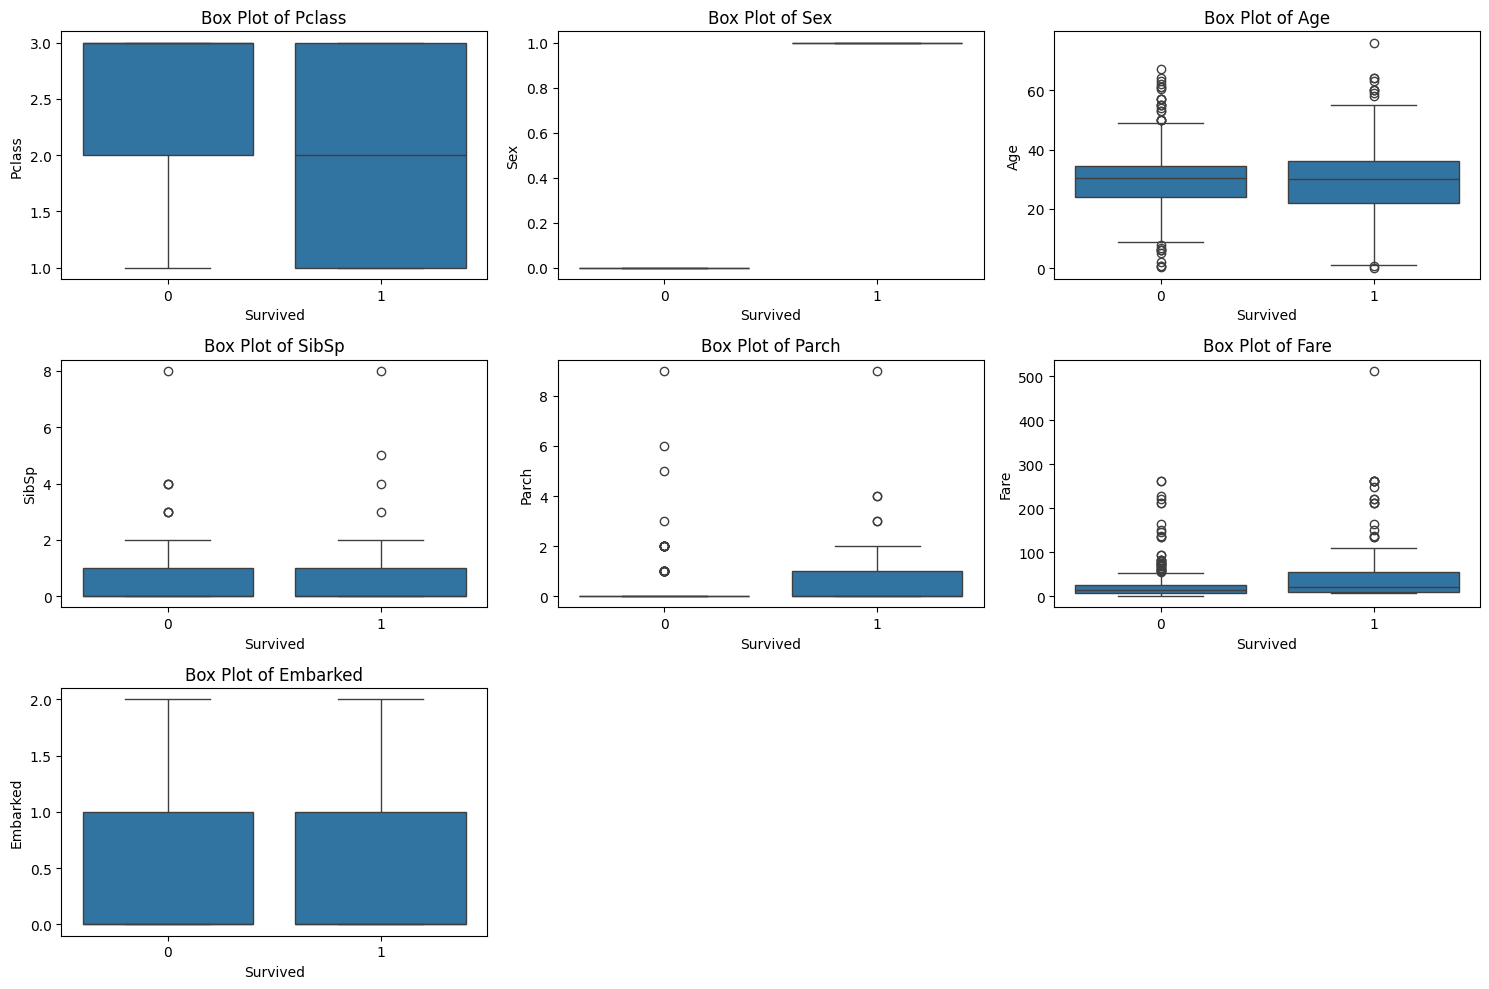

In [11]:
# 이상치 확인 (박스플록)
plt.figure(figsize=(15,10))
for i, column in enumerate(titanic.columns[1:]) :
    plt.subplot(3,3,i+1)
    sns.boxplot(x='Survived', y=column, data=titanic)
    plt.title(f'Box Plot of {column}')

plt.tight_layout()
plt.show()

In [12]:
# 중복 데이터 확인
titanic.duplicated().sum()

np.int64(38)

In [13]:
# 중복 데이터 삭제
titanic.drop_duplicates(inplace=True)
# 중복 데이터 확인
titanic.duplicated().sum()

np.int64(0)

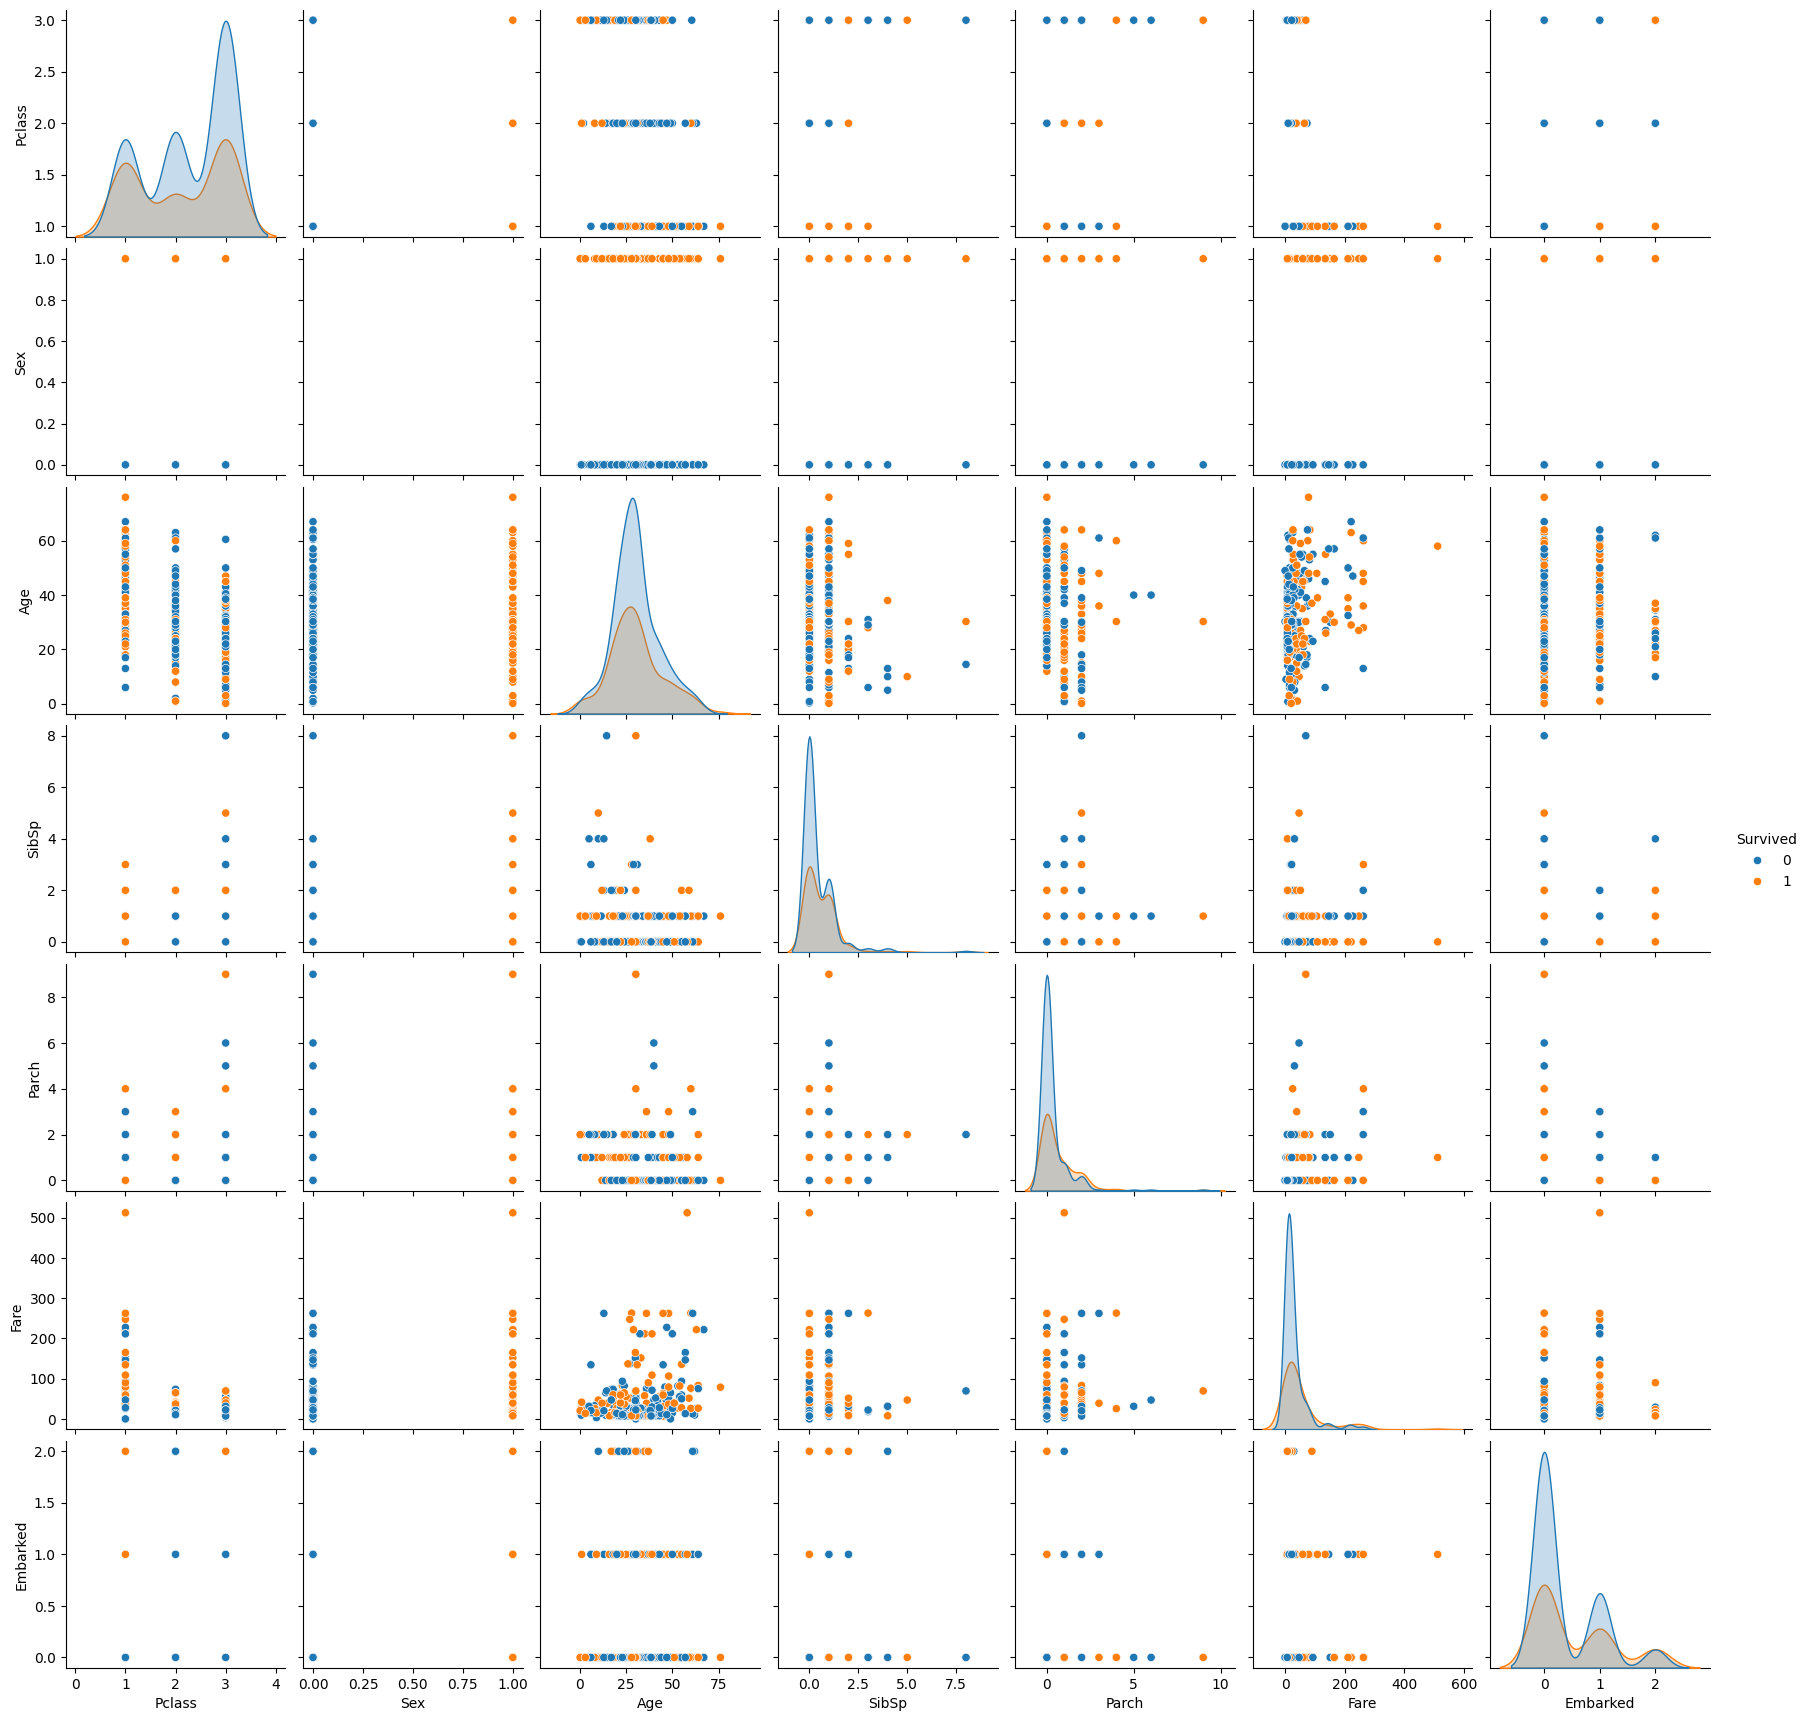

In [14]:
# 데이터 분포 및 밀도 확인
sns.pairplot(titanic, hue='Survived', diag_kind='kde')
plt.show()

In [15]:
# 상관관계 분석(상관계수 계산)
titanic.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,1.000000,-0.098558,1.000000,0.000185,0.089602,0.153469,0.185827,0.136083
Pclass,-0.098558,1.000000,-0.098558,-0.452854,0.026136,0.043019,-0.573341,-0.036357
Sex,1.000000,-0.098558,1.000000,0.000185,0.089602,0.153469,0.185827,0.136083
Age,0.000185,-0.452854,0.000185,1.000000,-0.082439,-0.046942,0.326510,0.101471
SibSp,0.089602,0.026136,0.089602,-0.082439,1.000000,0.297451,0.155630,-0.087647
Parch,0.153469,0.043019,0.153469,-0.046942,0.297451,1.000000,0.216319,-0.117041
Fare,0.185827,-0.573341,0.185827,0.326510,0.155630,0.216319,1.000000,0.091754
Embarked,0.136083,-0.036357,0.136083,0.101471,-0.087647,-0.117041,0.091754,1.000000


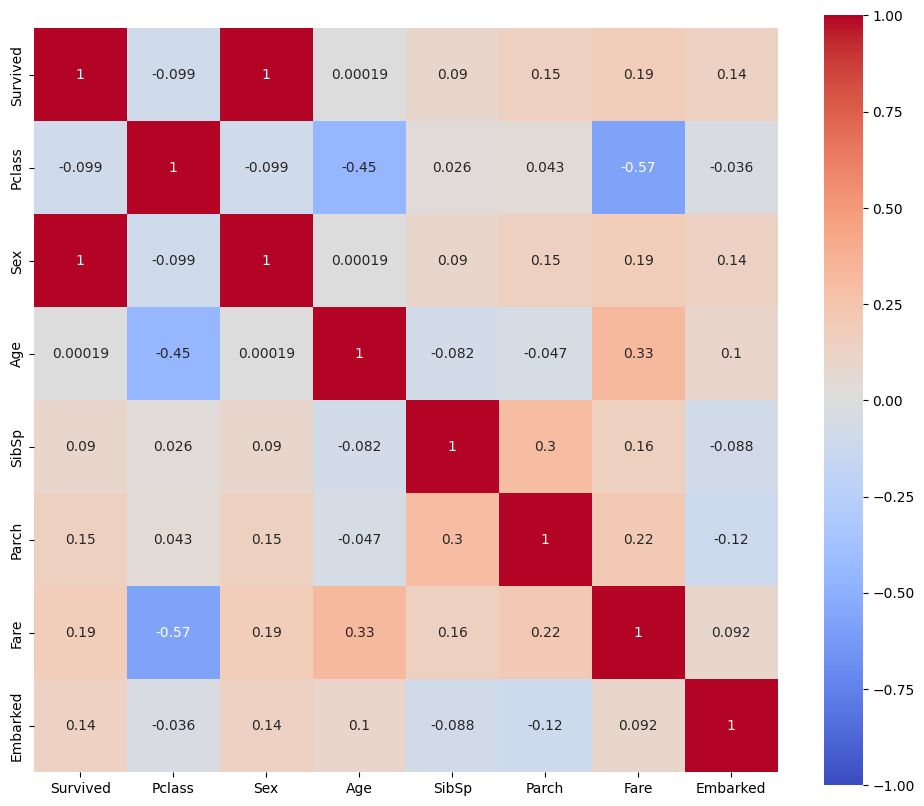

In [16]:
# 상관관계 시각화
plt.figure(figsize=(12,10))
sns.heatmap(data=titanic.corr(), vmin=-1, vmax=1, square=True, annot=True, cbar=True, cmap='coolwarm')
plt.show()

In [17]:
titanic

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,34.50000,0,0,7.8292,2
1,1,3,1,47.00000,1,0,7.0000,0
2,0,2,0,62.00000,0,0,9.6875,2
3,0,3,0,27.00000,0,0,8.6625,0
4,1,3,1,22.00000,1,1,12.2875,0
...,...,...,...,...,...,...,...,...
411,1,1,1,37.00000,1,0,90.0000,2
412,1,3,1,28.00000,0,0,7.7750,0
414,1,1,1,39.00000,0,0,108.9000,1
415,0,3,0,38.50000,0,0,7.2500,0


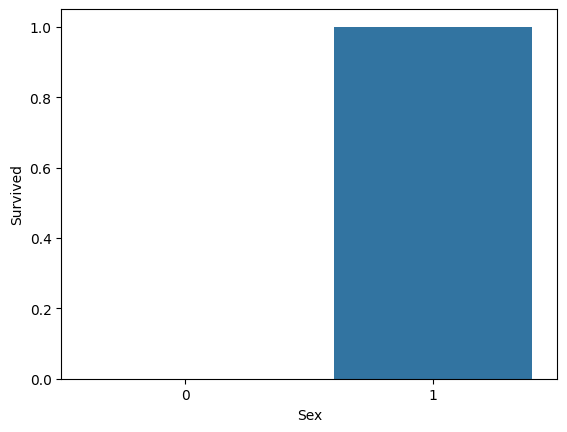

In [18]:
# 변수별 데이터 분석
sns.barplot(x='Sex', y='Survived', data=titanic)
plt.show()